In [1]:
import pandas as pd


In [2]:
df = pd.read_excel('./input/TUSZ/_DOCS/seizures_v36r.xlsx', engine='openpyxl', sheet_name='train', header=[0,1]).dropna(how='all')
df_dev = pd.read_excel('./input/TUSZ/_DOCS/seizures_v36r.xlsx', engine='openpyxl', sheet_name='dev', header=[0,1]).dropna(how='all')
df = pd.concat([df, df_dev], axis=0)

In [3]:
df.columns  = ['_'.join(col) for col in df.columns.values]

In [4]:
df.columns

Index(['Index_Unnamed: 0_level_1', 'File No._Unnamed: 1_level_1',
       'Patient_Unnamed: 2_level_1', 'Session_Unnamed: 3_level_1',
       'File_Unnamed: 4_level_1', 'EEG Type_Unnamed: 5_level_1',
       'EEG SubType_Unnamed: 6_level_1', 'LTM -or- Routine_Unnamed: 7_level_1',
       'Normal/ Abnormal_Unnamed: 8_level_1',
       'No. Seizures/ File_Unnamed: 9_level_1',
       'No. Seizures/ Session_Unnamed: 10_level_1',
       'No. Seizures/ Session_Filename', 'Seizure Time_Start',
       'Seizure Time_Stop', 'Seizure Type_Unnamed: 14_level_1',
       'Seizure Type_Unnamed: 15_level_1', 'Summary_EEG Type',
       'Summary_Sessions', 'Summary_Freq.', 'Summary_Cum.', 'Summary_Cum..1',
       'Summary_EEG SubType', 'Summary_Sessions.1', 'Summary_Freq..1',
       'Summary_Cum..2', 'Summary_Cum..3', 'Summary_Seizure Type',
       'Summary_Events', 'Summary_Freq..2', 'Summary_Cum..4',
       'Summary_Cum..5'],
      dtype='object')

In [5]:
df.count()

Index_Unnamed: 0_level_1                     7513
File No._Unnamed: 1_level_1                  7513
Patient_Unnamed: 2_level_1                   1423
Session_Unnamed: 3_level_1                   1423
File_Unnamed: 4_level_1                      5612
EEG Type_Unnamed: 5_level_1                  1423
EEG SubType_Unnamed: 6_level_1               1423
LTM -or- Routine_Unnamed: 7_level_1          1423
Normal/ Abnormal_Unnamed: 8_level_1          1423
No. Seizures/ File_Unnamed: 9_level_1        5612
No. Seizures/ Session_Unnamed: 10_level_1    1423
No. Seizures/ Session_Filename               7513
Seizure Time_Start                           3050
Seizure Time_Stop                            3050
Seizure Type_Unnamed: 14_level_1             3050
Seizure Type_Unnamed: 15_level_1                0
Summary_EEG Type                               32
Summary_Sessions                               50
Summary_Freq.                                  36
Summary_Cum.                                   16


In [6]:
fs_df =  pd.DataFrame.from_dict(pd.read_pickle('./input/TUSZ/_DOCS/fs.pickle'), orient='index')
fs_df = fs_df.reset_index().rename(columns={"index": "filename"})
fs_df['filename'] = fs_df['filename'].apply(
    lambda x: './{}'.format(x.split('TUSZ/edf/')[1].split('.edf')[0]))
fs_df.sample(n=5)

,filename,fs,ch
1650,./train/01_tcp_ar/115/00011562/s004_2014_06_01...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-..."
5295,./train/03_tcp_ar_a/046/00004671/s016_2015_03_...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-..."
2555,./train/01_tcp_ar/130/00013010/s001_2015_08_28...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-..."
335,./dev/01_tcp_ar/098/00009839/s005_2013_07_21/0...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-..."
3800,./train/01_tcp_ar/065/00006563/s009_2010_02_11...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-..."


In [7]:
fs_df.astype({'filename': str, 'fs': str, 'ch': str})['ch'].unique()

array(["['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG ROC-REF', 'EEG LOC-REF', 'EEG EKG1-REF', 'EMG-REF', 'EEG 26-REF', 'EEG 27-REF', 'EEG 28-REF', 'EEG 29-REF', 'EEG 30-REF', 'EEG T1-REF', 'EEG T2-REF', 'PHOTIC-REF', 'IBI', 'BURSTS', 'SUPPR']",
       "['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF', 'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF', 'EEG T5-REF', 'EEG T6-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF', 'EEG ROC-REF', 'EEG LOC-REF', 'EEG EKG1-REF', 'EEG T1-REF', 'EEG T2-REF', 'PHOTIC-REF', 'IBI', 'BURSTS', 'SUPPR']",
       "['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-RE

In [8]:
# df =
df['Filename'] = df['No. Seizures/ Session_Filename'].apply(lambda x: x.split('.tse')[0])
len(df)


7513

In [9]:
fs_df_merged = pd.merge(left=fs_df, right=df, left_on='filename', right_on='Filename', how='right')
fs_df_merged.sample(10)

,filename,fs,ch,Index_Unnamed: 0_level_1,File No._Unnamed: 1_level_1,Patient_Unnamed: 2_level_1,Session_Unnamed: 3_level_1,File_Unnamed: 4_level_1,EEG Type_Unnamed: 5_level_1,EEG SubType_Unnamed: 6_level_1,...,Summary_Sessions.1,Summary_Freq..1,Summary_Cum..2,Summary_Cum..3,Summary_Seizure Type,Summary_Events,Summary_Freq..2,Summary_Cum..4,Summary_Cum..5,Filename
6179,./train/03_tcp_ar_a/064/00006413/s006_2010_02_...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",4800.0,3719.0,NaN,NaN,t000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/03_tcp_ar_a/064/00006413/s006_2010_02_...
5633,./train/02_tcp_le/032/00003208/s001_2006_09_08...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",95.0,53.0,NaN,NaN,t002,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/02_tcp_le/032/00003208/s001_2006_09_08...
2617,./train/01_tcp_ar/082/00008295/s007_2012_05_10...,"[512, 512, 512, 512, 512, 512, 512, 512, 512, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",2177.0,1621.0,NaN,NaN,t003,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/01_tcp_ar/082/00008295/s007_2012_05_10...
1314,./dev/02_tcp_le/059/00005943/s005_2009_07_08/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1328.0,946.0,5943.0,s005,t000,Unknown,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./dev/02_tcp_le/059/00005943/s005_2009_07_08/0...
2089,./train/01_tcp_ar/044/00004456/s015_2014_06_19...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",1048.0,719.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/01_tcp_ar/044/00004456/s015_2014_06_19...
4591,./train/01_tcp_ar/110/00011083/s003_2013_12_25...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",4091.0,3161.0,NaN,NaN,t007,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/01_tcp_ar/110/00011083/s003_2013_12_25...
6406,./train/03_tcp_ar_a/032/00003282/s004_2006_10_...,"[400, 400, 400, 400, 400, 400, 400, 400, 400, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",4910.0,3803.0,NaN,NaN,t000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/03_tcp_ar_a/032/00003282/s004_2006_10_...
3307,./train/01_tcp_ar/074/00007431/s008_2012_12_12...,"[512, 512, 512, 512, 512, 512, 512, 512, 512, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",4719.0,3640.0,NaN,NaN,t003,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/01_tcp_ar/074/00007431/s008_2012_12_12...
363,./dev/01_tcp_ar/098/00009866/s003_2013_07_24/0...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",1015.0,778.0,9866.0,s003,t001,EMU,EMU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./dev/01_tcp_ar/098/00009866/s003_2013_07_24/0...
4738,./train/01_tcp_ar/065/00006546/s034_2014_03_17...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",1112.0,763.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,./train/01_tcp_ar/065/00006546/s034_2014_03_17...


In [10]:
fs_df_merged.count()

filename                                     7513
fs                                           7513
ch                                           7513
Index_Unnamed: 0_level_1                     7513
File No._Unnamed: 1_level_1                  7513
Patient_Unnamed: 2_level_1                   1423
Session_Unnamed: 3_level_1                   1423
File_Unnamed: 4_level_1                      5612
EEG Type_Unnamed: 5_level_1                  1423
EEG SubType_Unnamed: 6_level_1               1423
LTM -or- Routine_Unnamed: 7_level_1          1423
Normal/ Abnormal_Unnamed: 8_level_1          1423
No. Seizures/ File_Unnamed: 9_level_1        5612
No. Seizures/ Session_Unnamed: 10_level_1    1423
No. Seizures/ Session_Filename               7513
Seizure Time_Start                           3050
Seizure Time_Stop                            3050
Seizure Type_Unnamed: 14_level_1             3050
Seizure Type_Unnamed: 15_level_1                0
Summary_EEG Type                               32


In [11]:
fs_df_merged.isna().any()

filename                                     False
fs                                           False
ch                                           False
Index_Unnamed: 0_level_1                     False
File No._Unnamed: 1_level_1                  False
Patient_Unnamed: 2_level_1                    True
Session_Unnamed: 3_level_1                    True
File_Unnamed: 4_level_1                       True
EEG Type_Unnamed: 5_level_1                   True
EEG SubType_Unnamed: 6_level_1                True
LTM -or- Routine_Unnamed: 7_level_1           True
Normal/ Abnormal_Unnamed: 8_level_1           True
No. Seizures/ File_Unnamed: 9_level_1         True
No. Seizures/ Session_Unnamed: 10_level_1     True
No. Seizures/ Session_Filename               False
Seizure Time_Start                            True
Seizure Time_Stop                             True
Seizure Type_Unnamed: 14_level_1              True
Seizure Type_Unnamed: 15_level_1              True
Summary_EEG Type               

In [12]:
def get_index(x):
    if 'EEG FP1-REF' in x:
        return x.index('EEG FP1-REF')
    elif 'EEG FP1-LE' in x:
        return x.index('EEG FP1-LE')
    else:
        return pd.NA
fs_df_merged['FP1_index'] = fs_df_merged['ch'].apply(get_index)

In [13]:
fs_df = fs_df_merged
fs_df['Seizure_Start'] = fs_df['Seizure Time_Start'].fillna(0)
fs_df['Seizure_Start'] = fs_df['Seizure_Start'] * (fs_df['fs'].map(lambda x: x[0]))
fs_df['Seizure_Start'] = fs_df['Seizure_Start'].apply(lambda x: [[int(x)]])
fs_df['Seizure_Stop'] = fs_df['Seizure Time_Stop'].fillna(0)
fs_df['Seizure_Stop'] = fs_df['Seizure_Stop'] * (fs_df['fs'].map(lambda x: x[0]))
fs_df['Seizure_Stop'] = fs_df['Seizure_Stop'].apply(lambda x: [[int(x)]])
fs_df.sample(5)

,filename,fs,ch,Index_Unnamed: 0_level_1,File No._Unnamed: 1_level_1,Patient_Unnamed: 2_level_1,Session_Unnamed: 3_level_1,File_Unnamed: 4_level_1,EEG Type_Unnamed: 5_level_1,EEG SubType_Unnamed: 6_level_1,...,Summary_Cum..3,Summary_Seizure Type,Summary_Events,Summary_Freq..2,Summary_Cum..4,Summary_Cum..5,Filename,FP1_index,Seizure_Start,Seizure_Stop
990,./dev/01_tcp_ar/065/00006546/s018_2012_01_30/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",153.0,97.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,./dev/01_tcp_ar/065/00006546/s018_2012_01_30/0...,0,[[267981]],[[278445]]
5826,./train/02_tcp_le/011/00001113/s001_2004_01_16...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",644.0,388.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,./train/02_tcp_le/011/00001113/s001_2004_01_16...,0,[[71504]],[[73396]]
7232,./train/03_tcp_ar_a/062/00006230/s006_2010_09_...,"[400, 400, 400, 400, 400, 400, 400, 400, 400, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",5369.0,4114.0,NaN,NaN,t001,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,./train/03_tcp_ar_a/062/00006230/s006_2010_09_...,0,[[0]],[[0]]
917,./dev/01_tcp_ar/065/00006546/s022_2012_02_23/0...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",198.0,124.0,NaN,NaN,t010,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,./dev/01_tcp_ar/065/00006546/s022_2012_02_23/0...,0,[[105920]],[[113734]]
1621,./train/01_tcp_ar/069/00006904/s005_2010_08_21...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",3332.0,2481.0,6904.0,s005,t002,Inpatient,General,...,NaN,NaN,NaN,NaN,NaN,NaN,./train/01_tcp_ar/069/00006904/s005_2010_08_21...,0,[[256]],[[25619]]


In [14]:
fs_df['fs_FP1'] = fs_df['fs'].map(lambda x: x[0])
df_tusz = fs_df.groupby(['Filename', 'fs_FP1'])['Seizure_Start'].agg(sum).reset_index()
df_tusz = df_tusz.merge(fs_df.groupby('Filename')['Seizure_Stop'].agg(sum).reset_index(), on='Filename')
df_tusz.sample(5)


,Filename,fs_FP1,Seizure_Start,Seizure_Stop
537,./dev/01_tcp_ar/095/00009578/s020_2013_08_18/0...,256,[[0]],[[0]]
1889,./train/01_tcp_ar/081/00008156/s014_2015_08_31...,256,[[0]],[[0]]
3554,./train/01_tcp_ar/113/00011333/s021_2014_03_24...,256,[[0]],[[0]]
3918,./train/01_tcp_ar/127/00012742/s007_2015_04_07...,256,[[0]],[[0]]
4994,./train/03_tcp_ar_a/051/00005101/s003_2008_10_...,400,[[0]],[[0]]


In [15]:
df = df.fillna(method="ffill")

In [16]:
df['patient'] = df['Patient_Unnamed: 2_level_1']
df_pat_filename = df[['patient', 'Filename']].drop_duplicates()
# df = df.dropna(subset=['patient'])
# # df.head()
df_tusz = pd.merge(df_tusz, df_pat_filename, how='left', on='Filename')
df_tusz.count()

Filename         5612
fs_FP1           5612
Seizure_Start    5612
Seizure_Stop     5612
patient          5612
dtype: int64

In [17]:
df_tusz.sample(10)

,Filename,fs_FP1,Seizure_Start,Seizure_Stop,patient
1278,./train/01_tcp_ar/044/00004456/s015_2014_06_19...,256,[[0]],[[0]],4456.0
882,./dev/01_tcp_ar/101/00010106/s004_2013_08_06/0...,250,[[0]],[[0]],10106.0
462,./dev/01_tcp_ar/095/00009578/s006_2013_03_02/0...,256,[[0]],[[0]],9578.0
5362,./train/03_tcp_ar_a/091/00009162/s002_2012_04_...,250,[[0]],[[0]],9162.0
3052,./train/01_tcp_ar/104/00010427/s002_2013_12_14...,256,[[0]],[[0]],10427.0
727,./dev/01_tcp_ar/098/00009839/s005_2013_07_21/0...,256,[[68100]],[[82180]],9839.0
2270,./train/01_tcp_ar/087/00008738/s004_2013_06_04...,256,[[0]],[[0]],8738.0
3732,./train/01_tcp_ar/119/00011915/s001_2014_07_10...,256,"[[348], [9936], [23796], [69112]]","[[4092], [19459], [41220], [88532]]",11915.0
4216,./train/02_tcp_le/002/00000244/s003_2004_01_08...,250,[[0]],[[0]],244.0
701,./dev/01_tcp_ar/098/00009839/s002_2013_04_15/0...,256,[[0]],[[0]],9839.0


In [18]:
# df_tusz.rename(columns={'(patient, )': 'patient'})
def get_shortname(x):
    short_filename = (x.split('/')[-1]).split('.tse')[0]
    pat_num = int(short_filename.split('_')[0])
    session = short_filename.split('_')[1]
    t = short_filename.split('_')[2]
    return "{}_{}_{}".format(pat_num, session, t)
df_tusz['shortname'] = df_tusz['Filename'].apply(get_shortname)
df_tusz.head()

,Filename,fs_FP1,Seizure_Start,Seizure_Stop,patient,shortname
0,./dev/01_tcp_ar/002/00000258/s002_2003_07_21/0...,400,[[0]],[[0]],258.0,258_s002_t000
1,./dev/01_tcp_ar/002/00000258/s002_2003_07_21/0...,400,[[0]],[[0]],258.0,258_s002_t002
2,./dev/01_tcp_ar/002/00000258/s003_2003_07_22/0...,400,[[0]],[[0]],258.0,258_s003_t000
3,./dev/01_tcp_ar/002/00000258/s003_2003_07_22/0...,400,[[0]],[[0]],258.0,258_s003_t001
4,./dev/01_tcp_ar/002/00000258/s003_2003_07_22/0...,400,[[3531]],[[69351]],258.0,258_s003_t002


In [19]:
ref_df = pd.read_csv('./input/TUSZ/_DOCS/ref_train.txt',sep=' ', header=None,  names=['Filename', 'start', 'end', 'if_seizure', 'n/a'])
dev_df = pd.read_csv('./input/TUSZ/_DOCS/ref_dev.txt',sep=' ', header=None,  names=['Filename', 'start', 'end', 'if_seizure', 'n/a'])
ref_df = pd.concat([ref_df, dev_df])
ref_df['Filename'] = ref_df['Filename'].apply(lambda x: x.lstrip("0"))
ref_df.sample(10)

,Filename,start,end,if_seizure,n/a
5445,9934_s002_t005,0.0000,601.0000,bckg,1.0
777,6514_s008_t000,151.9720,154.0000,bckg,1.0
1919,10106_s002_t004,0.0000,328.1211,bckg,1.0
7730,4671_s020_t004,0.0000,300.0000,bckg,1.0
1069,5452_s002_t000,9.7160,122.1477,seiz,1.0
5197,11914_s001_t000,1884.0100,2697.0000,bckg,1.0
1360,9578_s037_t003,0.0000,601.0000,bckg,1.0
5147,11927_s003_t001,550.5014,599.6385,seiz,1.0
9104,883_s003_t003,370.1100,378.0000,bckg,1.0
2757,9104_s003_t001,923.8145,947.3203,bckg,1.0


In [20]:
ref_df.nunique()

Filename      5612
start         5850
end           6983
if_seizure       2
n/a              1
dtype: int64

In [21]:
ref_df.groupby('Filename')['start'].count().sort_values(ascending=False)

Filename
10418_s012_t001    105
11333_s012_t007     95
10020_s001_t001     87
10489_s002_t001     83
8616_s001_t000      83
                  ... 
7446_s003_t007       1
7446_s003_t008       1
7446_s003_t009       1
7446_s007_t000       1
5427_s012_t003       1
Name: start, Length: 5612, dtype: int64

In [22]:
length_df = ref_df.drop_duplicates(subset=['Filename'], keep='last')[['Filename', 'end']]
length_df = length_df.rename(columns={'end': 'length'})

In [23]:
df_tusz = pd.merge(df_tusz, length_df, left_on='shortname', right_on='Filename', how='left',suffixes=("", "_y"))
df_tusz['length'] = (df_tusz['length'] * df_tusz['fs_FP1']).astype('int')
df_tusz.sample(10)

,Filename,fs_FP1,Seizure_Start,Seizure_Stop,patient,shortname,Filename_y,length
190,./dev/01_tcp_ar/084/00008453/s005_2012_03_05/0...,250,[[0]],[[0]],8453.0,8453_s005_t001,8453_s005_t001,173250
2390,./train/01_tcp_ar/091/00009104/s008_2014_09_25...,256,[[0]],[[0]],9104.0,9104_s008_t001,9104_s008_t001,149504
2789,./train/01_tcp_ar/100/00010023/s002_2013_02_21...,256,[[0]],[[0]],10023.0,10023_s002_t005,10023_s002_t005,153856
661,./dev/01_tcp_ar/095/00009578/s037_2013_08_30/0...,256,[[0]],[[0]],9578.0,9578_s037_t006,9578_s037_t006,57856
2112,./train/01_tcp_ar/084/00008480/s009_2012_11_23...,256,[[0]],[[0]],8480.0,8480_s009_t001,8480_s009_t001,236544
643,./dev/01_tcp_ar/095/00009578/s034_2013_08_27/0...,256,[[0]],[[0]],9578.0,9578_s034_t009,9578_s034_t009,153856
3488,./train/01_tcp_ar/112/00011272/s003_2014_02_19...,256,[[0]],[[0]],11272.0,11272_s003_t005,11272_s003_t005,76800
52,./dev/01_tcp_ar/022/00002289/s008_2012_03_16/0...,512,[[0]],[[0]],2289.0,2289_s008_t000,2289_s008_t000,17408
4917,./train/03_tcp_ar_a/045/00004552/s001_2007_11_...,400,[[0]],[[0]],4552.0,4552_s001_t002,4552_s001_t002,130000
5569,./train/03_tcp_ar_a/129/00012957/s004_2015_07_...,256,[[0]],[[0]],12957.0,12957_s004_t010,12957_s004_t010,153856


In [24]:
df_tusz = df_tusz.rename(columns={'Seizure_Start': 'onsets', 'Seizure_Stop': 'offsets', 'Filename': 'file_name'})
df_tusz = df_tusz.drop(columns=['shortname', 'Filename_y'])

In [25]:
df_tusz["patient"] = df_tusz["patient"].astype("int")
df_tusz.sample(10)

,file_name,fs_FP1,onsets,offsets,patient,length
594,./dev/01_tcp_ar/095/00009578/s029_2013_08_23/0...,256,"[[65701], [131937], [209792], [301012]]","[[87728], [162058], [226674], [322332]]",9578,395008
3677,./train/01_tcp_ar/118/00011869/s005_2014_08_13...,256,[[77079]],[[122663]],11869,250624
2716,./train/01_tcp_ar/099/00009932/s006_2014_10_02...,256,[[0]],[[0]],9932,153856
1100,./train/01_tcp_ar/009/00000906/s007_2003_04_28...,400,[[0]],[[0]],906,128400
3025,./train/01_tcp_ar/104/00010418/s006_2013_06_10...,256,[[0]],[[0]],10418,153856
33,./dev/01_tcp_ar/022/00002289/s003_2012_03_12/0...,512,[[0]],[[0]],2289,307712
3990,./train/01_tcp_ar/129/00012960/s003_2015_06_18...,256,[[0]],[[0]],12960,153856
1280,./train/01_tcp_ar/044/00004456/s015_2014_06_19...,256,"[[83205], [116256], [124679], [133927], [177720]]","[[90615], [120351], [128272], [140826], [181781]]",4456,284928
1598,./train/01_tcp_ar/070/00007032/s008_2011_02_22...,250,[[250]],[[612250]],7032,612500
4361,./train/02_tcp_le/019/00001986/s002_2006_09_18...,250,[[0]],[[0]],1986,40500


In [26]:
def get_file_name_compatible(x):
    split = x.split('/')
    _,mode,tcp, directory, _, _, filename = split
    filename = filename.split('.tse')[0]
    return "{}/{}/{}/{}.edf".format(mode, tcp, directory, filename)

df_tusz["file_name"] = df_tusz["file_name"].apply(get_file_name_compatible)
df_tusz.head()


,file_name,fs_FP1,onsets,offsets,patient,length
0,dev/01_tcp_ar/002/00000258_s002_t000.edf,400,[[0]],[[0]],258,8000
1,dev/01_tcp_ar/002/00000258_s002_t002.edf,400,[[0]],[[0]],258,108800
2,dev/01_tcp_ar/002/00000258_s003_t000.edf,400,[[0]],[[0]],258,93600
3,dev/01_tcp_ar/002/00000258_s003_t001.edf,400,[[0]],[[0]],258,89600
4,dev/01_tcp_ar/002/00000258_s003_t002.edf,400,[[3531]],[[69351]],258,81200


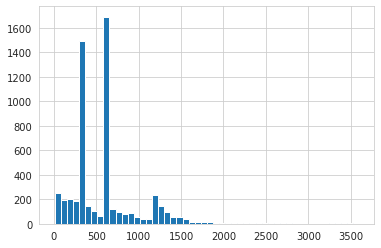

In [27]:
(df_tusz['length']/ df_tusz['fs_FP1']).hist(bins = 50)


In [28]:
testset = (df_tusz[df_tusz['file_name'].apply(lambda x: x.startswith('dev'))])
cond = testset['onsets'].apply(lambda x: x[0][0] if x[0][0] != 0 else pd.NA) <= testset['fs_FP1']
len(testset['onsets'].apply(lambda x: x if x[0][0] != 0 else []).sum())

# df_tusz[df_tusz['file_name'].apply(lambda x: x.startswith('dev'))]

673

In [29]:
df_tusz.to_csv('./output/TUSZ_labels.csv')

## eeg-gnn-ssl labels

In [30]:
df_gnn = pd.DataFrame(columns=["File", "label", "mode"])
for mode in ["trainSet", "testSet", "devSet"]:
    for sz_nosz in ["sz", "nosz"]:
        df_gnn_mode = pd.read_csv('./input/TUSZ/file_markers_detection/{}_seq2seq_60s_{}.txt'.format(mode, sz_nosz),
                             sep=',',
                             names=["File", "label"])
        df_gnn_mode["mode"] = mode
        df_gnn = pd.concat((df_gnn, df_gnn_mode))
df_gnn.sample(n=10)

,File,label,mode
29526,00012229_s007_t007.edf_1.h5,0,trainSet
3734,00013085_s002_t016.edf_3.h5,0,devSet
12356,00001204_s002_t001.edf_9.h5,0,trainSet
6993,00005427_s002_t000.edf_4.h5,0,trainSet
10152,00009162_s002_t008.edf_7.h5,0,trainSet
13557,00000883_s007_t001.edf_9.h5,0,trainSet
7159,00009697_s006_t007.edf_3.h5,0,testSet
32715,00009352_s007_t000.edf_1.h5,0,trainSet
18087,00011596_s002_t001.edf_12.h5,0,trainSet
2224,00011077_s003_t001.edf_7.h5,1,trainSet


In [31]:
df_gnn['file_index'] = df_gnn["File"].apply(lambda x: int(x.split('.h5')[0].split('_')[-1]))
df_gnn['file_name'] = df_gnn["File"].apply(lambda x: x.split('.edf')[0])
df_gnn.head()

,File,label,mode,file_index,file_name
0,00004892_s001_t001.edf_23.h5,1,trainSet,23,00004892_s001_t001
1,00011580_s001_t008.edf_5.h5,1,trainSet,5,00011580_s001_t008
2,00010418_s016_t001.edf_5.h5,1,trainSet,5,00010418_s016_t001
3,00007793_s001_t001.edf_1.h5,1,trainSet,1,00007793_s001_t001
4,00006440_s004_t000.edf_2.h5,1,trainSet,2,00006440_s004_t000


In [32]:
df_gnn.groupby('mode')['label'].value_counts()

mode      label
devSet    0         4878
          1          625
testSet   0         7550
          1         1298
trainSet  0        35019
          1         3594
Name: label, dtype: int64

In [33]:
df_gnn[df_gnn['mode']=='testSet'].groupby('file_name')['file_index'].count()

file_name
00000258_s001_t000    29
00000258_s002_t002     4
00000258_s003_t000     3
00000258_s003_t001     3
00000258_s003_t002     3
                      ..
00010639_s008_t001    10
00010639_s008_t002     5
00010639_s008_t003    10
00010639_s008_t004    10
00010861_s001_t000    20
Name: file_index, Length: 879, dtype: int64

In [34]:
df_tusz[df_tusz['file_name'].apply(lambda x: '00010639_s008_t003' in x)]

,file_name,fs_FP1,onsets,offsets,patient,length
894,dev/01_tcp_ar/106/00010639_s008_t003.edf,256,[[0]],[[0]],10639,153856


In [35]:
unique_df = df_gnn.groupby('file_name')['mode'].unique().reset_index(name='mode')
unique_df['mode'].value_counts()

[trainSet]    3896
[testSet]      879
[devSet]       582
Name: mode, dtype: int64

In [36]:
df_tusz['file_name_edf'] = df_tusz['file_name'].apply(lambda x: x.split('/')[-1].split('.edf')[0])
df_tusz.head()

,file_name,fs_FP1,onsets,offsets,patient,length,file_name_edf
0,dev/01_tcp_ar/002/00000258_s002_t000.edf,400,[[0]],[[0]],258,8000,00000258_s002_t000
1,dev/01_tcp_ar/002/00000258_s002_t002.edf,400,[[0]],[[0]],258,108800,00000258_s002_t002
2,dev/01_tcp_ar/002/00000258_s003_t000.edf,400,[[0]],[[0]],258,93600,00000258_s003_t000
3,dev/01_tcp_ar/002/00000258_s003_t001.edf,400,[[0]],[[0]],258,89600,00000258_s003_t001
4,dev/01_tcp_ar/002/00000258_s003_t002.edf,400,[[3531]],[[69351]],258,81200,00000258_s003_t002


In [37]:
df_tusz['file_name_edf'].nunique()

5612

In [38]:
df_gnn_single_index = df_gnn.drop_duplicates(subset=['file_name'], keep='last')
df_merged = pd.merge(left=df_tusz, right=df_gnn_single_index, how="outer", left_on='file_name_edf', right_on="file_name",suffixes=("", "_y"))
df_merged.sample(n=15)
df_merged.to_csv('./output/TUSZ_gnn_labels.csv')

In [39]:
df_merged[df_merged.isna().any(axis=1)]

,file_name,fs_FP1,onsets,offsets,patient,length,file_name_edf,File,label,mode,file_index,file_name_y
0,dev/01_tcp_ar/002/00000258_s002_t000.edf,400,[[0]],[[0]],258,8000,00000258_s002_t000,NaN,NaN,NaN,NaN,NaN
13,dev/01_tcp_ar/010/00001027_s003_t000.edf,400,[[0]],[[0]],1027,185600,00001027_s003_t000,NaN,NaN,NaN,NaN,NaN
14,dev/01_tcp_ar/010/00001027_s003_t001.edf,400,[[0]],[[0]],1027,177200,00001027_s003_t001,NaN,NaN,NaN,NaN,NaN
15,dev/01_tcp_ar/010/00001027_s004_t000.edf,400,[[13622]],[[64924]],1027,133600,00001027_s004_t000,NaN,NaN,NaN,NaN,NaN
16,dev/01_tcp_ar/010/00001027_s004_t001.edf,400,[[34935]],[[89203]],1027,141200,00001027_s004_t001,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5506,train/03_tcp_ar_a/122/00012262_s002_t002.edf,256,[[0]],[[0]],12262,6656,00012262_s002_t002,NaN,NaN,NaN,NaN,NaN
5536,train/03_tcp_ar_a/124/00012418_s004_t003.edf,256,[[0]],[[0]],12418,5888,00012418_s004_t003,NaN,NaN,NaN,NaN,NaN
5566,train/03_tcp_ar_a/129/00012957_s004_t006.edf,256,[[0]],[[0]],12957,10496,00012957_s004_t006,NaN,NaN,NaN,NaN,NaN
5588,train/03_tcp_ar_a/130/00013085_s002_t013.edf,256,[[0]],[[0]],13085,6400,00013085_s002_t013,NaN,NaN,NaN,NaN,NaN


In [40]:
df_merged[df_merged['onsets'].apply(lambda x: x[0][0] != 0)].sample(n=5)

,file_name,fs_FP1,onsets,offsets,patient,length,file_name_edf,File,label,mode,file_index,file_name_y
3662,train/01_tcp_ar/118/00011869_s001_t004.edf,256,"[[76962], [376323]]","[[112851], [415306]]",11869,539136,00011869_s001_t004,00011869_s001_t004.edf_13.h5,0,devSet,13.0,00011869_s001_t004
5272,train/03_tcp_ar_a/075/00007584_s002_t002.edf,256,"[[18441], [64582], [100898], [127666], [151510]]","[[28112], [76465], [109523], [130374], [153600]]",7584,153856,00007584_s002_t002,00007584_s002_t002.edf_5.h5,0,trainSet,5.0,00007584_s002_t002
5478,train/03_tcp_ar_a/115/00011580_s006_t004.edf,256,[[85018]],[[100909]],11580,194560,00011580_s006_t004,00011580_s006_t004.edf_7.h5,0,trainSet,7.0,00011580_s006_t004
3378,train/01_tcp_ar/108/00010843_s010_t000.edf,256,[[22516]],[[36657]],10843,46848,00010843_s010_t000,00010843_s010_t000.edf_0.h5,0,trainSet,0.0,00010843_s010_t000
411,dev/01_tcp_ar/088/00008889_s004_t015.edf,256,"[[36368], [103186]]","[[40110], [108665]]",8889,153856,00008889_s004_t015,00008889_s004_t015.edf_5.h5,0,testSet,5.0,00008889_s004_t015


In [65]:
df_tusz['seconds'] = df_tusz['length'] / df_tusz['fs_FP1']
# df_tusz.groupby('patient')['seconds'].sum().reset_index().sort_values('patient')
df_tusz_validation_choose = df_tusz.groupby('patient').size().reset_index(name='count')
pd.merge(df_tusz_validation_choose,
df_tusz.groupby('patient')['seconds'].sum().reset_index(name='seconds'), on='patient').sort_values('seconds')

,patient,count,seconds
379,7771,1,42.0
576,11575,1,79.0
624,12978,1,140.0
152,2568,2,504.0
77,1246,3,512.0
...,...,...,...
236,4671,77,48002.0
530,10418,92,51109.0
327,6546,121,62489.0
459,9104,96,68344.0


## Channels

In [41]:
EEG_channels = ['EEG FP1-REF', 'EEG FP2-REF', 'EEG F3-REF', 'EEG F4-REF', 'EEG C3-REF', 'EEG C4-REF', 'EEG P3-REF',
                'EEG P4-REF', 'EEG O1-REF', 'EEG O2-REF', 'EEG F7-REF', 'EEG F8-REF', 'EEG T3-REF', 'EEG T4-REF',
                'EEG T5-REF', 'EEG T6-REF', 'EEG A1-REF', 'EEG A2-REF', 'EEG FZ-REF', 'EEG CZ-REF', 'EEG PZ-REF']

fs_df.sample(3)

,filename,fs,ch,Index_Unnamed: 0_level_1,File No._Unnamed: 1_level_1,Patient_Unnamed: 2_level_1,Session_Unnamed: 3_level_1,File_Unnamed: 4_level_1,EEG Type_Unnamed: 5_level_1,EEG SubType_Unnamed: 6_level_1,...,Summary_Seizure Type,Summary_Events,Summary_Freq..2,Summary_Cum..4,Summary_Cum..5,Filename,FP1_index,Seizure_Start,Seizure_Stop,fs_FP1
5928,./train/02_tcp_le/065/00006514/s020_2010_05_17...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",466.0,306.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,./train/02_tcp_le/065/00006514/s020_2010_05_17...,0,[[66762]],[[73594]],250
1629,./train/01_tcp_ar/068/00006811/s002_2010_02_12...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",1608.0,1149.0,6811.0,s002,t000,Unknown,Unknown,...,NaN,NaN,NaN,NaN,NaN,./train/01_tcp_ar/068/00006811/s002_2010_02_12...,0,[[15963]],[[58756]],250
5360,./train/02_tcp_le/009/00000922/s001_2003_06_17...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",346.0,227.0,922.0,s001,t001,Inpatient,General,...,NaN,NaN,NaN,NaN,NaN,./train/02_tcp_le/009/00000922/s001_2003_06_17...,0,[[0]],[[0]],250


In [42]:
fs_df['ref_ch_num'] = fs_df['ch'].apply(lambda x: sum([(a in EEG_channels) for a in x]))
fs_df.sample(5)

,filename,fs,ch,Index_Unnamed: 0_level_1,File No._Unnamed: 1_level_1,Patient_Unnamed: 2_level_1,Session_Unnamed: 3_level_1,File_Unnamed: 4_level_1,EEG Type_Unnamed: 5_level_1,EEG SubType_Unnamed: 6_level_1,...,Summary_Events,Summary_Freq..2,Summary_Cum..4,Summary_Cum..5,Filename,FP1_index,Seizure_Start,Seizure_Stop,fs_FP1,ref_ch_num
2104,./train/01_tcp_ar/054/00005427/s012_2012_10_26...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",2241.0,1677.0,NaN,NaN,t005,NaN,NaN,...,NaN,NaN,NaN,NaN,./train/01_tcp_ar/054/00005427/s012_2012_10_26...,0,[[0]],[[0]],256,21
470,./dev/01_tcp_ar/098/00009839/s005_2013_07_21/0...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",931.0,719.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./dev/01_tcp_ar/098/00009839/s005_2013_07_21/0...,0,[[152108]],[[161062]],256,21
954,./dev/01_tcp_ar/065/00006546/s026_2013_09_05/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",223.0,140.0,6546.0,s026,t000,Inpatient,General,...,NaN,NaN,NaN,NaN,./dev/01_tcp_ar/065/00006546/s026_2013_09_05/0...,0,[[0]],[[0]],250,21
7426,./train/03_tcp_ar_a/071/00007128/s004_2010_10_...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",5429.0,4164.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./train/03_tcp_ar_a/071/00007128/s004_2010_10_...,0,[[871165]],[[889453]],256,19
7087,./train/03_tcp_ar_a/061/00006175/s003_2011_04_...,"[256, 256, 256, 256, 256, 256, 256, 256, 256, ...","[EEG FP1-REF, EEG FP2-REF, EEG F3-REF, EEG F4-...",5744.0,4373.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./train/03_tcp_ar_a/061/00006175/s003_2011_04_...,0,[[49602]],[[55688]],256,19


In [43]:
fs_df['ref_ch_num'].value_counts()

21    5156
19    1441
0      916
Name: ref_ch_num, dtype: int64

In [44]:
fs_df[fs_df['ref_ch_num'] == 0]['filename'].apply(lambda x: str(x.split('/')[1:3])).unique()


array(["['dev', '02_tcp_le']", "['train', '02_tcp_le']"], dtype=object)

In [45]:
fs_df[fs_df['filename'].apply(lambda x: x.startswith('./dev/02'))]

,filename,fs,ch,Index_Unnamed: 0_level_1,File No._Unnamed: 1_level_1,Patient_Unnamed: 2_level_1,Session_Unnamed: 3_level_1,File_Unnamed: 4_level_1,EEG Type_Unnamed: 5_level_1,EEG SubType_Unnamed: 6_level_1,...,Summary_Events,Summary_Freq..2,Summary_Cum..4,Summary_Cum..5,Filename,FP1_index,Seizure_Start,Seizure_Stop,fs_FP1,ref_ch_num
1207,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1287.0,924.0,3635.0,s001,t001,Outpatient,Outpatient,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,0,[[49760]],[[50615]],250,0
1208,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1288.0,924.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,0,[[78005]],[[78766]],250,0
1209,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1289.0,924.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,0,[[152529]],[[153039]],250,0
1210,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1290.0,924.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,0,[[189231]],[[190028]],250,0
1211,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1291.0,924.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/036/00003635/s001_2006_07_20/0...,0,[[215928]],[[216426]],250,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,./dev/02_tcp_le/022/00002297/s002_2007_10_22/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1278.0,921.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/022/00002297/s002_2007_10_22/0...,0,[[201644]],[[214247]],250,0
1324,./dev/02_tcp_le/022/00002297/s002_2007_10_22/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1279.0,921.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/022/00002297/s002_2007_10_22/0...,0,[[227223]],[[257410]],250,0
1325,./dev/02_tcp_le/022/00002297/s002_2007_10_22/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1280.0,921.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/022/00002297/s002_2007_10_22/0...,0,[[267624]],[[303109]],250,0
1326,./dev/02_tcp_le/010/00001027/s001_2004_01_27/0...,"[250, 250, 250, 250, 250, 250, 250, 250, 250, ...","[EEG FP1-LE, EEG FP2-LE, EEG F3-LE, EEG F4-LE,...",1249.0,906.0,1027.0,s001,t001,Inpatient,General,...,NaN,NaN,NaN,NaN,./dev/02_tcp_le/010/00001027/s001_2004_01_27/0...,0,[[139171]],[[169729]],250,0


In [46]:
EEG_channels_LE = ['EEG FP1-LE', 'EEG FP2-LE', 'EEG F3-LE', 'EEG F4-LE', 'EEG C3-LE', 'EEG C4-LE', 'EEG P3-LE',
                'EEG P4-LE', 'EEG O1-LE', 'EEG O2-LE', 'EEG F7-LE', 'EEG F8-LE', 'EEG T3-LE', 'EEG T4-LE',
                'EEG T5-LE', 'EEG T6-LE', 'EEG A1-LE', 'EEG A2-LE', 'EEG FZ-LE', 'EEG CZ-LE', 'EEG PZ-LE']

def get_EEG_index(eeg_labels):
    indices = []
    for label, label_le in zip(EEG_channels, EEG_channels_LE):
        if label in eeg_labels:
            indices.append(eeg_labels.index(label))
        elif label_le in eeg_labels:
            indices.append(eeg_labels.index(label_le))
        else:
            indices.append(-1)
    return indices

fs_df['ref_ch'] = fs_df['ch'].apply(get_EEG_index)
fs_df['ref_ch'].astype(str).unique()

array(['[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 27, 28, 18, 19, 20]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 26, 27, 18, 19, 20]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21, 16, 17, 18]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 24, 25, 18, 19, 20]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 23, 24, 18, 19, 20]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 22, 23, 18, 19, 20]',
       '[0, 1, 2, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 6, 7, 18, 19, 20]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, -1, -1, 16, 17, 18]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, -1, -1, 18, 19, 20]',
       '[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 25, 26, 18, 19, 20]'],
      dtype=object)